In [18]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Load data

In [2]:
X_train = pd.read_csv('../data/preprocessed/X_train.csv')
X_test = pd.read_csv('../data/preprocessed/X_test.csv')
y_train = pd.read_csv('../data/preprocessed/y_train.csv')
y_test = pd.read_csv('../data/preprocessed/y_test.csv')

In [3]:
# instantiating random forest
rforest = RandomForestClassifier(random_state = 75)

In [4]:
# range for n estimators varying from 20 to 2000
n_estimators = np.arange(20, 200, step = 20)
# criterions
criterion = ["gini", "entropy"]
# max_features types
max_features = ["auto", "sqrt", "log2"]
# varying depth of trees from 2 to 20
max_depth = list(np.arange(2, 20, step = 1))
# variying the min samples split from 2 to 100
min_samples_split = np.arange(2, 100, step = 2)
# varying the minime leaves' samples
min_samples_leaf = [1, 2, 4, 6, 8, 10]
# bootstrap true or false
bootstrap = [True, False]

In [5]:
# dictionary with parameters to vary
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [6]:
# hyperparameters on randomized search cv
random_cv = RandomizedSearchCV(rforest, 
                               param_grid, 
                               n_iter = 10, 
                               cv = 10, 
                               scoring = "recall", 
                               n_jobs = -1, 
                               random_state = 75
)

In [7]:
# fitting
rcv = random_cv.fit(X_train, y_train)

c:\Users\pedro\OneDrive\Documentos\fraud_detection\.venv\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [8]:
# creating dataframe with hyperparameters' tests
tuning = pd.DataFrame(rcv.cv_results_)

In [9]:
# instanntiating random forest
rfn = RandomForestClassifier(**rcv.best_params_, random_state = 75)

# training model
model = rfn.fit(X_train, y_train)
# predicted values
y_pred = rfn.predict(X_test)

C:\Users\pedro\AppData\Local\Temp\ipykernel_11748\4115382181.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rfn.fit(X_train, y_train)


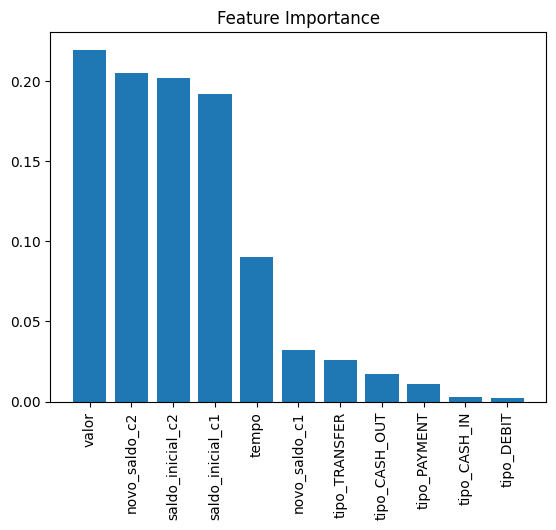

In [19]:
importances = rfn.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [16]:
# analyzing accuracy
print('Accuracy: {}'.format(metrics.accuracy_score(y_test, y_pred).round(2)))
# analyzing precision
print('Precision: {}'.format(metrics.precision_score(y_test, y_pred).round(2)))
# analyzing recall
print('Recall: {}'.format(metrics.recall_score(y_test, y_pred).round(2)))
# analyzing F1 score
print('F1 Score: {}'.format(metrics.f1_score(y_test, y_pred).round(2)))

Accuracy: 1.0
Precision: 0.92
Recall: 0.52
F1 Score: 0.67


In [12]:
joblib.dump(model, '../model/model_random_forest_1.0.pkl')

['../model/model_random_forest_1.0.pkl']